<a href="https://colab.research.google.com/github/Mintass/INFO213/blob/main/INFO213_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Drexel University
## College of Computing and Informatics
## INFO 213: Data Science Programming II
## Assignment 1
## Due Date: Sunday, April 13, 2025
## This assignment counts for 15% of the final grade


### A. What to Hand In

Sumbit a completed this Jupyter notebook.

### B. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.


# YOUR NAME: Hanjun Xu

In [148]:
import random

# Question 1: Implement a single variable perceptron
In this question, you are asked to implement the perceptron learning algorithm for input with a single variable, i.e., learn a linear function $z=w_0+w_1x$ to classify a single value $x$ as $1$ or $-1$.
The perceptron algorithm can be summarized by the following steps:
1. Initialize the weights $w_0$ and $w_1$.
2. For each training example $x^{(i)}$,
 1. Compute the linear combination: $z^{(i)}=w_0 + w_1{x}^{(i)}$
 2. Compute the output value
 \begin{equation}
    \bar{y}^{(i)}=\phi(z^{(i)})=
\begin{cases}
    1,& \text{if } z^{(i)}\geq 0\\
    -1,              & \text{otherwise}
\end{cases}
\end{equation}
 3. Update the weights $w_0$ and $w_1$ as follows:
    * $w_0 := w_0 + \Delta w_0 = w_0 + \eta(y^{(i)}-\bar{y}^{(i)})$
    * $w_1 := w_1 + \Delta w_1 = w_1 + \eta(y^{(i)}-\bar{y}^{(i)})x^{(i)}$
    * Where, $\eta$ is a learning rate.

Step 1: In the following program, we have defined the functions `computeZ(x, w0, w1)`, `predict(x, w0, w1)`, `computeDelta(eta, x, ytrue, ypred)`, and `fit(eta, epochs, X, y, w0, w1, verbose=False)`. You need to complete the program by finishing the function `fit(eta, epochs, X, y, w0, w1, verboase=False)`.

In [149]:
## IMPLEMENT THE FOLLOWING FUNCTIONS

def computeZ(x, w0, w1):
    """
    compute the output z value given an input and the weights
    input: x: the value of the input variable
           w0: the weight of the bias
           w1: the weight of the variable
    output: the value of linear combination
    """
    return w0 + w1 * x



def predict(x, w0, w1):
    """
    predict the label of input x by the perceptron
    input: x: the input value
           w0: the weight of the bias
           w1: the weight of the variable
    output: predicted label of x 1 or -1
    """
    z = computeZ(x, w0, w1)
    return 1 if z >= 0 else -1



def computeDelta(eta, x, ytrue, ypred):
    """
    compute the amount of weight to be updated for a variable, given
    the true label, and the predicted lable
    input: eta: learning rate
           x: the value of the input variable
           ytrue: the true lable (1 or -1)
           ypred: the predicted lable (1 or -1)
    output: the amount to be updated for the variable
    """
    return eta * (ytrue - ypred) * x



def fit(eta, epochs, X, y, w0, w1, verbose=False):
    """
    fit a single variable perceptron by updating the given weights
    input: eta: learning rate
           epochs: the number of learning iterations
           X: a vector of input values
           y: a vector of true labels corresponding to the input values
           w0: the weigth of bias
           w1: the weight of the variable
           verbose: boolean value; if True, print out the intermediate values.
    output: (w0, w1): the weights after perceptron learning
            errors: the number of mis-classifications in each epoch iteration
    """
    errors = []
    for epoch in range(epochs):
        epoch_errors = 0
        for i in range(len(X)):
            ypred = predict(X[i], w0, w1)
            if y[i] != ypred:
                epoch_errors += 1
                w0 += computeDelta(eta, 1, y[i], ypred)
                w1 += computeDelta(eta, X[i], y[i], ypred)
                if verbose:
                    print(f'epoch {epoch+1}, sample {i+1}: x={X[i]}, y_true={y[i]}, y_pred={ypred}, updated w0={w0}, w1={w1}')
                    
        errors.append(epoch_errors)
        if verbose:
            print(f'after epoch {epoch+1}, misclassifications: {epoch_errors}\n')

    return (w0, w1), errors

Step 2: The following function `generateXy()` will generate 25 random values that are in [-1, 0.5] with label -1 and  25 random values that are in [1.5, 3] with label 1. Use the function to create a set of training values $X$ and their corresponding labels $y$. **Plot $X$ and $y$ with different colors for different labels. Also plot a line $z=1-x$ along with the points. Name the plot as "50 Points and an Initial Model".**

In [150]:
import numpy as np
import matplotlib.pyplot as plt
def generateXy():
    """
    Generate 25 random values that are in [-1, 0.5] with label -1 and
    25 random values that are in [1.5, 3] with label 1.
    The values are used for training a single variable perceptron.
    Input: None
    Output: (X, y): 25 values in [-1, 0.5] with label -1
                    and 25 values in [1.5, 3] with label 1
    """

    # Generate 25 random points that x < 0.5 and y = -1
    np.random.RandomState(1234)

    x1 = np.random.uniform(-1, 0.5, size=25)
    y1 = np.ones(len(x1)) * -1

    # Generate 25 random points that x > 1.5 and y = 1
    x2 = np.random.uniform(1.5, 3, size=25)
    y2 = np.ones(len(x2))

    x12 = np.concatenate((x1, x2))
    y12 = np.concatenate((y1, y2))

    Xy = list(zip(x12, y12))
    random.shuffle(Xy)

    return Xy

In [151]:
# GENERATE TRAINING DATA AND LABELS
data = generateXy()

x_vals, y_vals = zip(*data)
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)

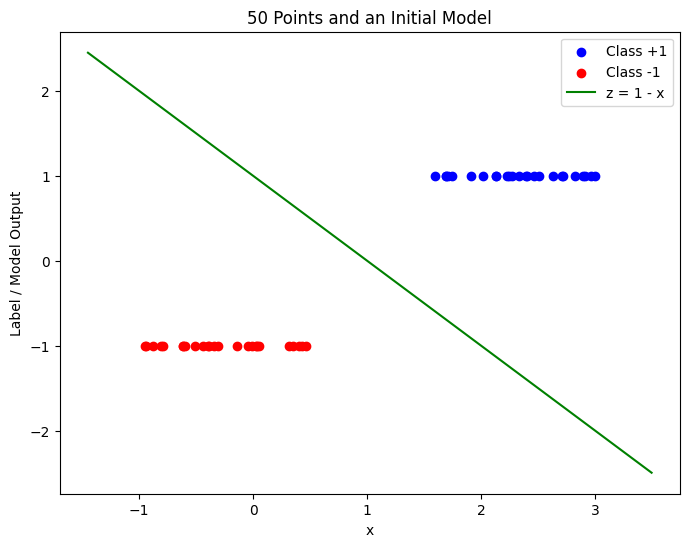

In [152]:
# YOUR CODE TO PLOT THE POINTS LABELED WITH DIFFERENT COLORS FOR DIFFERENT LABELS
pos_idx = np.where(y_vals == 1)
neg_idx = np.where(y_vals == -1)

plt.figure(figsize=(8,6))

plt.scatter(x_vals[pos_idx], y_vals[pos_idx], color='blue', label='Class +1')
plt.scatter(x_vals[neg_idx], y_vals[neg_idx], color='red', label='Class -1')

x_line = np.linspace(min(x_vals) - 0.5, max(x_vals) + 0.5, 100)
z_line = 1 - x_line
plt.plot(x_line, z_line, color='green', label='z = 1 - x')

plt.title("50 Points and an Initial Model")
plt.xlabel("x")
plt.ylabel("Label / Model Output")
plt.legend()
plt.show()

Step 3: Intialize the weights $w_0=1$ and $w_1=-1$. Apply the impelemented `fit()` function at Step 1 on $X$ and $y$ above to learn a new model. Use learning rate $\eta=1$ and $epochs=5$. Assign the final weights to a variable `weights` and the list errors to a variable `errors`.

In [153]:
w0 = 1
w1 = -1

eta = 1
epochs = 5

data = generateXy()
x_vals, y_vals = zip(*data)
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)

In [154]:
(weights, errors) = fit(eta, epochs, x_vals, y_vals, w0, w1, verbose=True)

print("Final weights:", weights)
print("Errors per epoch:", errors)

epoch 1, sample 1: x=2.509110654590746, y_true=1.0, y_pred=-1, updated w0=3.0, w1=4.018221309181492
epoch 1, sample 2: x=-0.6326656885931341, y_true=-1.0, y_pred=1, updated w0=1.0, w1=5.283552686367759
epoch 1, sample 3: x=-0.10811707094073575, y_true=-1.0, y_pred=1, updated w0=-1.0, w1=5.499786828249231
epoch 1, sample 11: x=0.484358809415947, y_true=-1.0, y_pred=1, updated w0=-3.0, w1=4.531069209417337
after epoch 1, misclassifications: 4

after epoch 2, misclassifications: 0

after epoch 3, misclassifications: 0

after epoch 4, misclassifications: 0

after epoch 5, misclassifications: 0

Final weights: (-3.0, 4.531069209417337)
Errors per epoch: [4, 0, 0, 0, 0]


Step 4: Plot the points represented by $(X, y)$, the initial model, and the final model learned at Step 3.

In [155]:
data = generateXy()
x_vals, y_vals = zip(*data)
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)

w0_initial = 1
w1_initial = -1

eta = 1
epochs = 5
(weights, errors) = fit(eta, epochs, x_vals, y_vals, w0_initial, w1_initial, verbose=False)
w0_final, w1_final = weights

x_line = np.linspace(min(x_vals)-0.5, max(x_vals)+0.5, 100)

initial_line = w0_initial + w1_initial * x_line
final_line = w0_final + w1_final * x_line

pos_idx = np.where(y_vals == 1)
neg_idx = np.where(y_vals == -1)

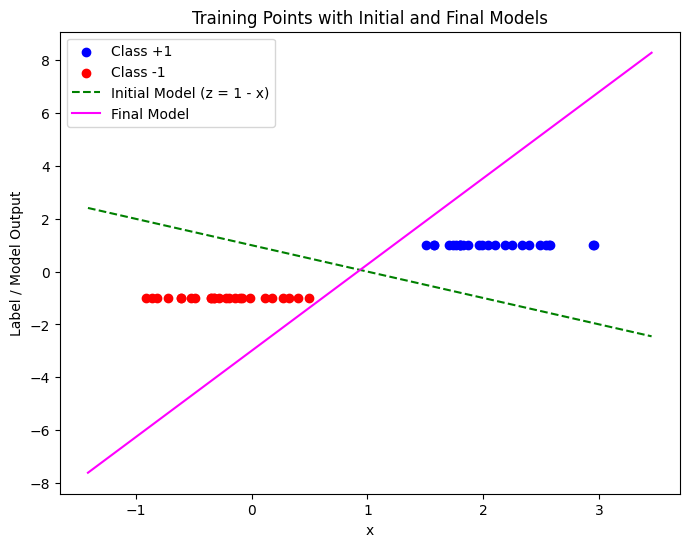

In [156]:
plt.figure(figsize=(8, 6))

plt.scatter(x_vals[pos_idx], y_vals[pos_idx], color='blue', label='Class +1')
plt.scatter(x_vals[neg_idx], y_vals[neg_idx], color='red', label='Class -1')

plt.plot(x_line, initial_line, linestyle='--', color='green', label='Initial Model (z = 1 - x)')

plt.plot(x_line, final_line, linestyle='-', color='magenta', label='Final Model')

plt.title("Training Points with Initial and Final Models")
plt.xlabel("x")
plt.ylabel("Label / Model Output")
plt.legend()
plt.show()

Step 5: Plot the errors vs. epochs.

In [157]:
epochs_range = range(1, len(errors) + 1)

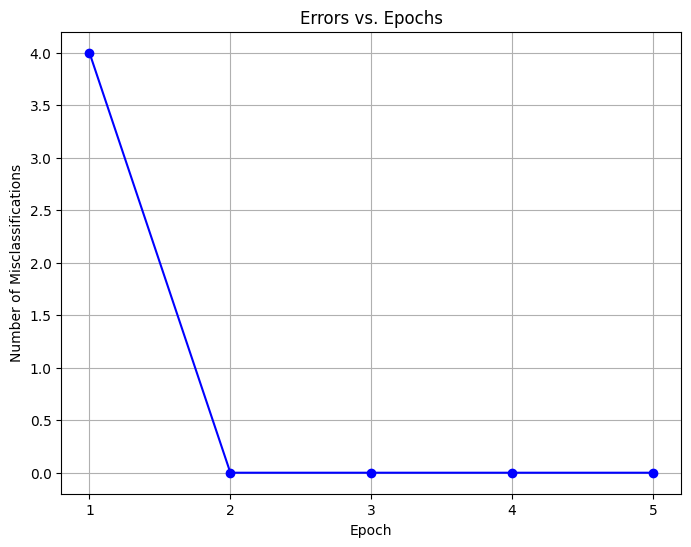

In [158]:
plt.figure(figsize=(8, 6))
plt.plot(epochs_range, errors, marker='o', linestyle='-', color='blue')
plt.title("Errors vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("Number of Misclassifications")
plt.xticks(epochs_range)
plt.grid(True)
plt.show()

Step 6: Classification accuracy is defined as the ratio of correctly predicted instances to the total instances in a dataset. Compute the classification accuracy of the initial model $1-x$ and the final model learned at Step 3 on the training data $X$. **Discuss the results!**

In [159]:
def accuracy(model_weights, X, y):
    w0, w1 = model_weights
    preds = [predict(x, w0, w1) for x in X]
    correct = sum(1 for p, true in zip(preds, y) if p == true)
    
    return correct / len(y)

In [160]:
# Classification accuracy using the initial model
initial_model_weights = (1, -1)
initial_accuracy = accuracy(initial_model_weights, x_vals, y_vals)
print("Initial Model Accuracy:", initial_accuracy)

Initial Model Accuracy: 0.0


In [161]:
# Classification accuracy using the final model
final_model_weights = (w0_final, w1_final)
final_accuracy = accuracy(final_model_weights, x_vals, y_vals)
print("Final Model Accuracy:", final_accuracy)

Final Model Accuracy: 1.0


Step 7: At this step, you will experiment with different learning rates $\eta$ when training a model. Create a list of $\eta$ values as `etas = np.arange(0.1, 1.1, 0.1)`. If neccesary, generate training data $X$ and $y$ using `generateXy()`. Fit a perceptraon model on $X$ and $y$ using each $eta$ value in the list. Initialize $w_0=1$ and $w_1=-1$. Set $epochs=5$ for all the trainings.  You should fit 10 models. Save the weights of the models in `weights_list`.

In [162]:
# GENERATE TRAINING DATA AND LABELS
etas = np.arange(0.1, 1.1, 0.1)
weights_list = []

data = generateXy()
x_vals, y_vals = zip(*data)
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)

In [163]:
epochs = 5

for eta in etas:
    initial_w0 = 1
    initial_w1 = -1

    (final_weights, errors) = fit(eta, epochs, x_vals, y_vals, initial_w0, initial_w1, verbose=False)
    
    weights_list.append(final_weights)
    
    print("Learning rate:", eta, "Final weights:", final_weights, "Epoch errors:", errors)

Learning rate: 0.1 Final weights: (-0.19999999999999996, 0.3380234129973242) Epoch errors: [10, 0, 0, 0, 0]
Learning rate: 0.2 Final weights: (-0.6000000000000002, 0.6546130382770509) Epoch errors: [8, 0, 0, 0, 0]
Learning rate: 0.30000000000000004 Final weights: (-0.8000000000000003, 1.2210720911718387) Epoch errors: [7, 0, 0, 0, 0]
Learning rate: 0.4 Final weights: (-0.6000000000000001, 1.308958775531277) Epoch errors: [4, 0, 0, 0, 0]
Learning rate: 0.5 Final weights: (-1.0, 1.8861984694140963) Epoch errors: [4, 0, 0, 0, 0]
Learning rate: 0.6 Final weights: (-1.3999999999999997, 2.463438163296915) Epoch errors: [4, 0, 0, 0, 0]
Learning rate: 0.7000000000000001 Final weights: (-1.8, 2.816591372430654) Epoch errors: [6, 0, 0, 0, 0]
Learning rate: 0.8 Final weights: (-2.2, 3.3618187113493194) Epoch errors: [6, 0, 0, 0, 0]
Learning rate: 0.9 Final weights: (-2.6000000000000005, 1.7215844189609046) Epoch errors: [4, 0, 0, 0, 0]
Learning rate: 1.0 Final weights: (-3.0, 2.023982687734338) E

Step 8: Plot the points represented by $(X, y)$ and the 10 models corresponding to 10 different learning rates $\eta$. Label each model appropriately. **Explain what you find!**

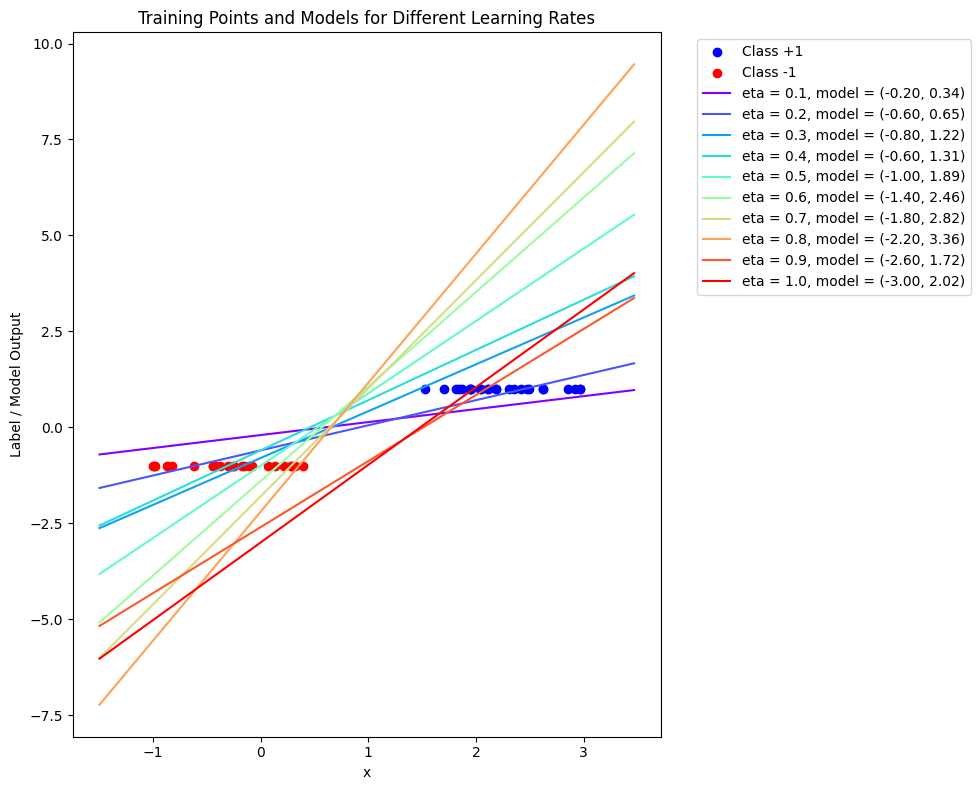

In [164]:
# plot the points and the models based on different eta
import matplotlib.cm as cm

plt.figure(figsize=(10, 8))

pos_idx = np.where(y_vals == 1)
neg_idx = np.where(y_vals == -1)
plt.scatter(x_vals[pos_idx], y_vals[pos_idx], color='blue', label='Class +1')
plt.scatter(x_vals[neg_idx], y_vals[neg_idx], color='red', label='Class -1')

colors = cm.rainbow(np.linspace(0, 1, len(etas)))

x_line = np.linspace(min(x_vals) - 0.5, max(x_vals) + 0.5, 100)

for i, (eta, model) in enumerate(zip(etas, weights_list)):
    w0, w1 = model
    y_line = w0 + w1 * x_line
    label = f"eta = {eta:.1f}, model = ({w0:.2f}, {w1:.2f})"
    plt.plot(x_line, y_line, linestyle='-', color=colors[i], label=label)

plt.title("Training Points and Models for Different Learning Rates")
plt.xlabel("x")
plt.ylabel("Label / Model Output")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- **Observations:**  
  - **Effect of eta:** Lower learning rates tend to make smaller adjustments per update, which can lead to a more gradual change from the initial model. Higher learning rates make larger updates, potentially leading to a more “jumpy” or aggressive change in the boundary.  
  - **Convergence in 5 Epochs:** Note that because the number of epochs is fixed at 5, none of the models may have completely converged to an identical boundary—even if the classes are linearly separable. Instead, the plot shows how the adjustment due to the learning rate influences the learned decision boundary within a limited number of epochs.

# Question 2: Implement a single variable Adaline Model
In this question, you are asked to implement the Adaline learning algorithm for input with a single variable, i.e., learn a linear function $z=w_0+w_1x$ to classify a single value $x$ as $1$ or $-1$.
The Adaline learning algorithm can be summarized by the following steps:
1. Initialize the weights $w_0$ and $w_1$.
2. For each training example $x^{(i)}$,
 1. Compute the linear combination: $z^{(i)}=w_0 + w_1{x}^{(i)}$
 2. Compute the activation value of $z^{(i)}$:
 $activation(z^{(i)})=\phi(z^{(i)})= z^{(i)}$
 3. Compute the error: $e^{(i)} = y^{(i)} - activation(z^{(i)})$
3. Update the weight $w_0$ as follows:
    * $w_0 := w_0 + \Delta w_0 = w_0 + \eta \Sigma_i e^{(i)}$
4. Update the weight $w_1$ as follows:
    * $w_1 := w_1 + \Delta w_1 = w_1 + \eta \Sigma_i (e^{(i)}x^{(i)})$
5. Compute the costs as:
    * costs = $\frac{1}{2}\Sigma_i (e^{(i)})^2$
6. Where, $\eta$ is a learning rate.

Step 1: In the following program, we have defined the functions `computeZ(x, w0, w1)`, `predict(x, w0, w1)`, `activation(z)`, and `fit(eta, epochs, X, y, w0, w1, verbose=False)`. You need to complete the program by finishing the function `fit(eta, epochs, X, y, w0, w1, verbose=False)`.

In [165]:
# IMPLEMENT THE FOLLOWING FUNCTIONS

def computeZ(x, w0, w1):
    """
    compute the output z value given an input and the weights
    input: x: the value of the input variable
           w0: the weight of the bias
           w1: the weight of the variable
    output: the value of linear combination
    """

    return w0 + w1 * x



def predict(x, w0, w1):
    """
    predict the label of input x by the perceptron
    input: x: the input value
           w0: the weight of the bias
           w1: the weight of the variable
    output: predicted label of x 1 or -1
    """

    z = computeZ(x, w0, w1)
    return 1 if z >=0 else -1




def activation(z):
    """
    compute the activation of the given value
    input: z: given value
    output: activation of the input value
    """

    return z




def fit(eta, epochs, X, y, w0, w1, verbose=False):
    """
    fit a single variable Adaline model by updating the given weights
    input: eta: learning rate
           epochs: the number of learning iterations
           X: a vector of input values
           y: a vector of true labels corresponding to the input values
           w0: the weigth of bias
           w1: the weight of the variable
           verbose: a boolean value; if True, print out the intermediate values
    output: (w0, w1): the weights after Adaline learning
            costs: the cost in each epoch
    """


    costs = []
    
    for epoch in range(epochs):
        sum_error = 0.0
        sum_error_x = 0.0
        cost = 0.0
        
        for i in range(len(X)):
            z = computeZ(X[i], w0, w1)
            a = activation(z)
            error = y[i] - a
            
            sum_error += error
            sum_error_x += error * X[i]
            cost += 0.5 * error**2
        
        w0 = w0 + eta * sum_error
        w1 = w1 + eta * sum_error_x
        
        costs.append(cost)
        
        if verbose:
            print(f"Epoch {epoch+1}/{epochs} - w0: {w0:.4f}, w1: {w1:.4f}, Cost: {cost:.4f}")
    
    return (w0, w1), costs

Step 2: The following function `generateXy()` will generate 25 random values that are in [-1, 0.5] with label -1 and  25 random values that are in [1.5, 3] with label 1. Use the function to create a set of training values $X$ and their corresponding labels $y$. **Plot $X$ and $y$ with different colors for different labels. Also plot a line $z=1-x$ along with the points. Name the plot as "50 Points and an Initial Model".**

In [166]:
import numpy as np
import matplotlib.pyplot as plt
def generateXy():
    """
    Generate 25 random values that are in [-1, 0.5] with label -1 and
    25 random values that are in [1.5, 3] with label 1.
    The values are used for training a single variable Adaline model.
    Input: None
    Output: (X, y): 25 values in [-1, 0.5] with label -1
                    and 25 values in [1.5, 3] with label 1
    """

    # Generate 25 random points that x < 0.5 and y = -1
    np.random.RandomState(1234)

    x1 = np.random.uniform(-1, 0.5, size=25)
    y1 = np.ones(len(x1)) * -1

    # Generate 25 random points that x > 1.5 and y = 1
    x2 = np.random.uniform(1.5, 3, size=25)
    y2 = np.ones(len(x2))

    x12 = np.concatenate((x1, x2))
    y12 = np.concatenate((y1, y2))

    Xy = list(zip(x12, y12))
    random.shuffle(Xy)

    return Xy

In [167]:
# GENERATE TRAINING DATA AND LABELS
data = generateXy()
X, y = zip(*data)
X = np.array(X)
y = np.array(y)

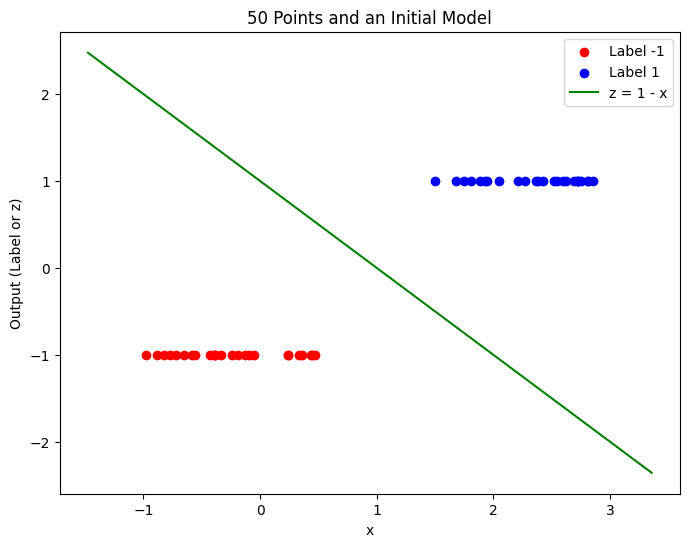

In [168]:
# YOUR CODE TO PLOT THE POINTS LABELED WITH DIFFERENT COLORS FOR DIFFERENT LABELS
plt.figure(figsize=(8,6))
plt.scatter(X[y == -1], y[y == -1], color='red', label='Label -1')
plt.scatter(X[y == 1], y[y == 1], color='blue', label='Label 1')

x_line = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5, 100)
z_line = 1 - x_line
plt.plot(x_line, z_line, 'g-', label='z = 1 - x')

plt.title("50 Points and an Initial Model")
plt.xlabel("x")
plt.ylabel("Output (Label or z)")
plt.legend()
plt.show()

Step 3: Intialize the weights $w_0=1$ and $w_1=-1$. Apply the impelemented Adaline learning function `fit()` at Step 1 on $X$ and $y$ above to learn a model. Use $epochs=30$. Use a learning rate that makes the algorithm converge, for example, 0.001. Assign the final weights to a variable `weights` and the list errors to a variable `costs`.

In [169]:
w0_initial = 1
w1_initial = -1

eta = 0.001
epochs = 30

In [170]:
weights, costs = fit(eta, epochs, X, y, w0_initial, w1_initial, verbose=True)

print("Final weights:", weights)
print("Cost history:", costs)

Epoch 1/30 - w0: 1.0025, w1: -0.8400, Cost: 136.0768
Epoch 2/30 - w0: 0.9966, w1: -0.7037, Cost: 112.3735
Epoch 3/30 - w0: 0.9837, w1: -0.5873, Cost: 95.1092
Epoch 4/30 - w0: 0.9654, w1: -0.4875, Cost: 82.3241
Epoch 5/30 - w0: 0.9427, w1: -0.4014, Cost: 72.6677
Epoch 6/30 - w0: 0.9167, w1: -0.3269, Cost: 65.2090
Epoch 7/30 - w0: 0.8880, w1: -0.2621, Cost: 59.3053
Epoch 8/30 - w0: 0.8574, w1: -0.2053, Cost: 54.5122
Epoch 9/30 - w0: 0.8253, w1: -0.1553, Cost: 50.5221
Epoch 10/30 - w0: 0.7922, w1: -0.1111, Cost: 47.1213
Epoch 11/30 - w0: 0.7585, w1: -0.0716, Cost: 44.1609
Epoch 12/30 - w0: 0.7243, w1: -0.0362, Cost: 41.5367
Epoch 13/30 - w0: 0.6900, w1: -0.0042, Cost: 39.1750
Epoch 14/30 - w0: 0.6557, w1: 0.0248, Cost: 37.0238
Epoch 15/30 - w0: 0.6216, w1: 0.0513, Cost: 35.0454
Epoch 16/30 - w0: 0.5878, w1: 0.0757, Cost: 33.2127
Epoch 17/30 - w0: 0.5545, w1: 0.0983, Cost: 31.5054
Epoch 18/30 - w0: 0.5216, w1: 0.1193, Cost: 29.9083
Epoch 19/30 - w0: 0.4892, w1: 0.1389, Cost: 28.4097
Epoch 

Step 4: Plot the points represented by $(X, y)$, the initial model, and the final model learned at Step 3.

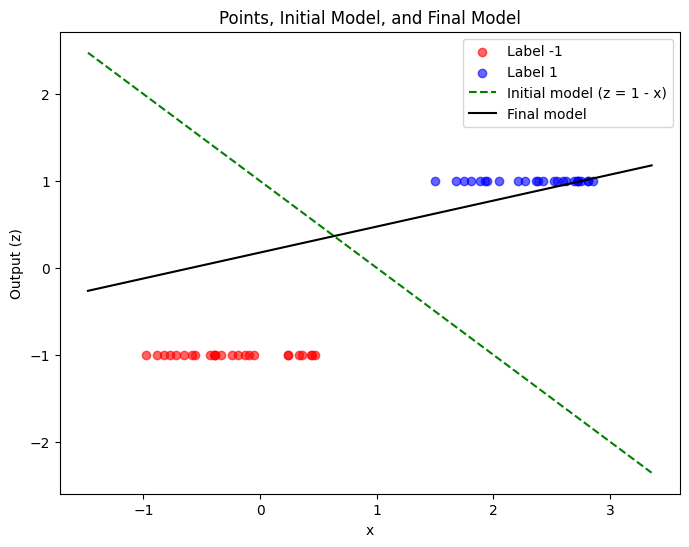

In [171]:
# Plot the points and the final model
x_line = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5, 100)
z_initial = w0_initial + w1_initial * x_line

final_w0, final_w1 = weights
z_final = final_w0 + final_w1 * x_line

plt.figure(figsize=(8,6))
plt.scatter(X[y == -1], y[y == -1], color='red', label='Label -1', alpha=0.6)
plt.scatter(X[y == 1], y[y == 1], color='blue', label='Label 1', alpha=0.6)

plt.plot(x_line, z_initial, 'g--', label="Initial model (z = 1 - x)")
plt.plot(x_line, z_final, 'k-', label="Final model")

plt.title("Points, Initial Model, and Final Model")
plt.xlabel("x")
plt.ylabel("Output (z)")
plt.legend()
plt.show()

Step 5: Plot the costs vs. epochs. **Discuss the results!**

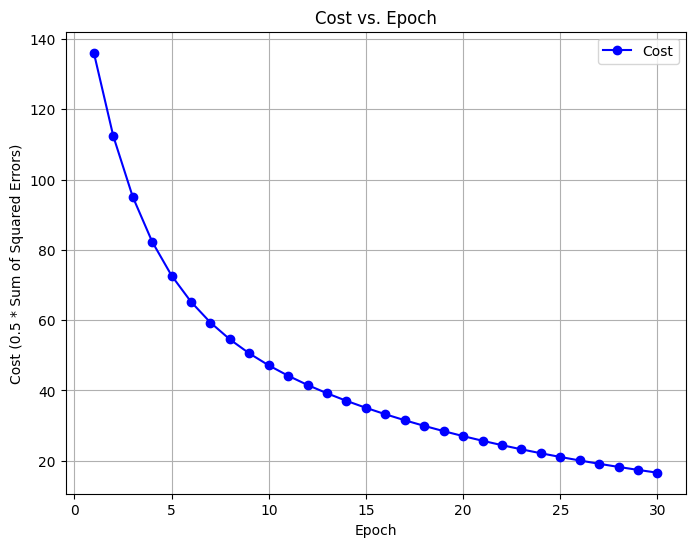

In [172]:
plt.figure(figsize=(8,6))
plt.plot(range(1, epochs + 1), costs, marker='o', linestyle='-', color='b', label='Cost')
plt.xlabel('Epoch')
plt.ylabel('Cost (0.5 * Sum of Squared Errors)')
plt.title('Cost vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

- **Decreasing Trend:** The plot shows the cost typically decreasing as the number of epochs increases
- **Convergence Behavior:** The plot should show the cost flattening out as the epochs progress, indicating that subsequent weight updates produce little change in the overall error.
- **Stability Over Time:** As the plot converges to a lower cost, one can be more confident that the changes in weights become minimal, signaling that further training may not substantially improve the model. 

Step 6: Classification accuracy is defined as the ratio of correctly predicted instances to the total instances in a dataset. Compute the classification accuracy of the initial model $1-x$ and the final model learned at Step 3 on the training data $X$. **Discuss the results!**

In [173]:
# Classification accuracy using the initial model
predictions_initial = [predict(x, w0_initial, w1_initial) for x in X]
accuracy_initial = sum(pred == true for pred, true in zip(predictions_initial, y)) / len(y)

print("Accuracy for initial model:", accuracy_initial)

Accuracy for initial model: 0.0


In [174]:
# Classification accuracy using the final model
final_w0, final_w1 = weights

predictions_final = [predict(x, final_w0, final_w1) for x in X]
accuracy_final = sum(pred == true for pred, true in zip(predictions_final, y)) / len(y)

print("Accuracy for final model:", accuracy_final)

Accuracy for final model: 0.62


Step 7: At this step, you will experiment with different learning rates $\eta$ when training a model. Create a list of $\eta$ values as `etas = [0.0001, 0.001, 0.005, 0.01]` or different list. If neccesary, generate training data $X$ and $y$ using `generateXy()`. Fit a perceptraon model on $X$ and $y$ using each $eta$ value in the list. Initialize $w_0=1$ and $w_1=-1$. Set $epochs=30\sim 50$ for all the trainings.  You should fit multiple models. Save the weights of the lines in `weights_list`.

In [175]:
# GENERATE TRAINING DATA AND LABELS
data = generateXy()
X, y = zip(*data)
X = np.array(X)
y = np.array(y)

In [176]:
etas = [0.0001, 0.001, 0.005, 0.01]
epochs = 50

In [177]:
weights_list = []

print("Fitting models for different learning rates:")
for eta in etas:
    w0_init = 1
    w1_init = -1
    
    weights, costs = fit(eta, epochs, X, y, w0_init, w1_init, verbose=False)
    weights_list.append(weights)
    print(f"Learning Rate: {eta} -> Final Weights: {weights}")

print("\nFinal weights for each learning rate:", weights_list)

Fitting models for different learning rates:
Learning Rate: 0.0001 -> Final Weights: (0.9347427093675854, -0.4608366153817701)
Learning Rate: 0.001 -> Final Weights: (-0.1960893398765527, 0.48034972031737405)
Learning Rate: 0.005 -> Final Weights: (-0.7464857909773737, 0.7368974960367349)
Learning Rate: 0.01 -> Final Weights: (-0.748269915081322, 0.7377285782871418)

Final weights for each learning rate: [(0.9347427093675854, -0.4608366153817701), (-0.1960893398765527, 0.48034972031737405), (-0.7464857909773737, 0.7368974960367349), (-0.748269915081322, 0.7377285782871418)]


Step 8: Plot the points represented by $(X, y)$ and the decision lines corresponding to different learning rates $\eta$. Label each line appropriately. **Explain what you find!**

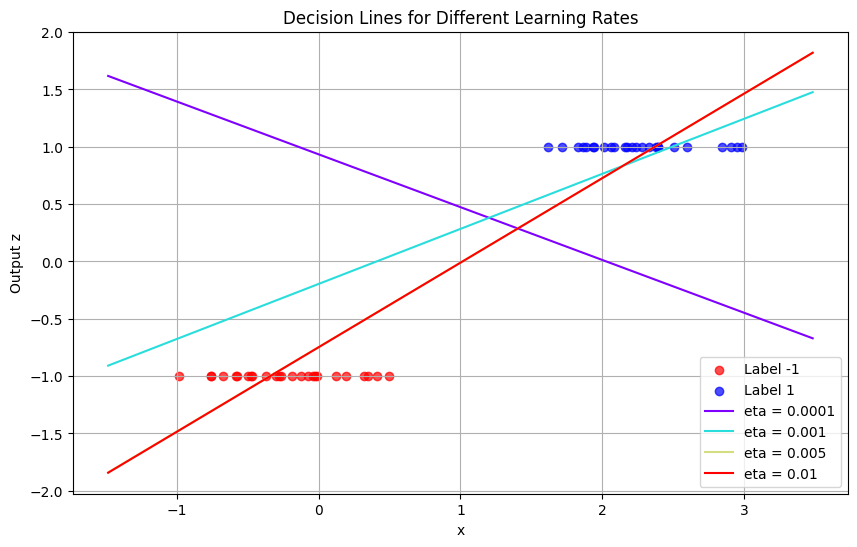

In [178]:
# plot the points and the models based on different eta
x_line = np.linspace(np.min(X) - 0.5, np.max(X) + 0.5, 100)

plt.figure(figsize=(10, 6))

plt.scatter(X[y == -1], y[y == -1], color='red', label='Label -1', alpha=0.7)
plt.scatter(X[y == 1], y[y == 1], color='blue', label='Label 1', alpha=0.7)

colors = cm.rainbow(np.linspace(0, 1, len(etas)))
for eta, weights, color in zip(etas, weights_list, colors):
    w0, w1 = weights
    y_line = w0 + w1 * x_line
    plt.plot(x_line, y_line, color=color, label=f'eta = {eta}')

plt.xlabel("x")
plt.ylabel("Output z")
plt.title("Decision Lines for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

- **Observations:**  
   - **Low Learning Rate (e.g., 0.0001):**  
     Often results in very slow changes. After 50 epochs, the weights might remain quite close to the initial values, so the decision line may be nearly identical to the starting model.
   - **High Learning Rate (e.g., 0.01):**  
     A higher eta can cause the updates to be too aggressive. Instead of gradually moving toward the optimum, the weights might overshoot the error minimum, meaning that during each update they jump past the best values. This can lead to convergence on a suboptimal decision boundary.